# Logistic Regression from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

ref: https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

## Sigmoid Function

$$\sigma(x)=\frac{1}{1+e^{-\theta^{t}x}}$$
$\theta^{t}x$ is theta transpose x.  
$\theta^{t}x=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...$  
Sigmoid function or logistic function is the hypothesis function for logistic regression.

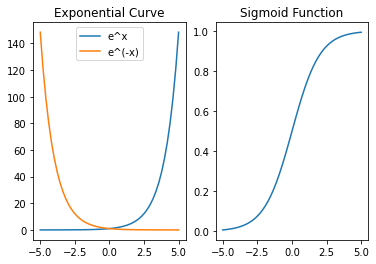

In [2]:
a=np.linspace(-5,5)
y1=[np.exp(x) for x in a]
y2=[np.exp(-x) for x in a]
sig=[1/(1+y) for y in y2]

plt.subplot(1,2,1)
plt.plot(a,y1,label="e^x")
plt.plot(a,y2,label="e^(-x)")
plt.legend()
plt.title("Exponential Curve")

plt.subplot(1,2,2)
plt.plot(a,sig)
plt.title("Sigmoid Function")
plt.show()

### Limits of Exponential
$$\lim_{x \to -\infty} e^{-x}=+\infty$$
$$\lim_{x \to 0} e^{-x}=1$$
$$\lim_{x \to +\infty} e^{-x}=0$$

### Limits of Sigmoid
$$\lim_{x \to -\infty} \sigma(x)=\lim_{x \to -\infty} \frac{1}{1+e^{-x}}=\frac{1}{1+\infty}=0$$

$$\lim_{x \to 0} \sigma(x)=\lim_{x \to 0} \frac{1}{1+e^{-x}}=\frac{1}{1+1}=0.5$$

$$\lim_{x \to +\infty} \sigma(x)=\lim_{x \to +\infty} \frac{1}{1+e^{-x}}=\frac{1}{1+0}=1$$

So, sigmoid function always end up with the result between 0 and 1. It has squashing effect. 

## Cost Function

$$\hat{y}=\frac{1}{1+e^{-z}}$$
$z=x_{1}*w_{1}+..........+x_{n}*w_{n} $

![Cost Function](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-cc75211ad9199ec33f790ca7d3ec43e1_l3.svg)
This equation can be combined into one.
![Combined Cost Function](https://miro.medium.com/max/700/1*h9idzK6YjMKKxfCl-Zq8eA.png)

## Model Training

1. Find derivative of cost functionwrt weight. (Derivative give dir and by how much should w should be changed to minimize loss.)
2. Updating each weight according to derivative until the local minimum is found, i.e. model doesn’t improve anymore so we can stop.

Final equation after Derivative: $$x_{i}.(\hat{y}-y)$$  
Then, use gradient descent to find local minimum.

In [3]:
from sklearn.datasets import load_iris
iris = pd.read_csv('iris.csv')
iris['target']=iris['Name'].map({'Iris-setosa':0,'Iris-virginica':1})
iris.dropna(axis=0,inplace=True)
X=iris.iloc[:,0:4].values
y=iris.iloc[:,5].values

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [4]:
pos = iris[iris['target']==1].count()
neg = iris[iris['target']==0].count()

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


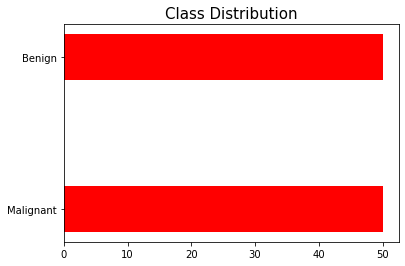

In [5]:
fig,ax=plt.subplots()
#ax.barh(['Iris-setosa','Iris-setosa'],[pos,neg],color='red')
ax.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3,color='red')
ax.set_title('Class Distribution', fontSize=15)
plt.show()

In [6]:
from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [7]:
logreg = LogisticRegression()
logreg.fit(X, y, epochs=500, lr=0.5)
y_pred = logreg.predict([[5.1, 3.5, 1.4, 0.2],[4.9, 3. , 1.4, 0.2],[7.3, 2.9, 6.3, 1.8]])
y_pred

[0, 0, 1]

In [10]:
np.mean(logreg.loss)

0.028150987976691164

In [11]:
logreg.weights

array([-1.26529654, -1.47789651,  2.9143681 ,  1.86270658])